# Ótimo! Podemos criar estratégias utilizando bibliotecas como Backtrader, Pandas, TA-Lib e yfinance para baixar dados do mercado brasileiro. Algumas abordagens incluem:

# Médias Móveis: Crossover de médias móveis curtas e longas para definir compras e vendas.
# Índice de Força Relativa (RSI): Comprar quando estiver sobrevendido e vender quando estiver sobrecomprado.
# Breakout: Identificar rompimentos de resistência e suporte.
# Machine Learning: Prever preços futuros com modelos como Random Forest, XGBoost ou redes neurais.#


# 1. Crossover de Médias Móveis
Compra quando a média móvel curta cruza acima da média longa.
Venda quando a média curta cruza abaixo da média longa.
python
Copiar
Editar


[*********************100%***********************]  1 of 1 completed


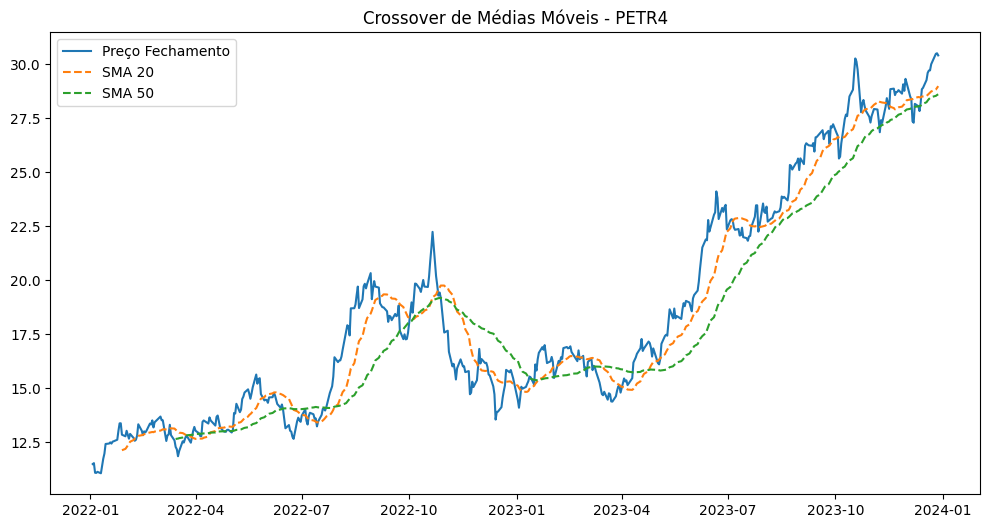

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Baixar dados da PETR4 (Petrobras) nos últimos 2 anos
df = yf.download("PETR4.SA", start="2022-01-01", end="2024-01-01")

# Calcular médias móveis
df["SMA_20"] = df["Close"].rolling(window=20).mean()
df["SMA_50"] = df["Close"].rolling(window=50).mean()

# Gerar sinais de compra e venda
df["Signal"] = 0
df.loc[df["SMA_20"] > df["SMA_50"], "Signal"] = 1
df.loc[df["SMA_20"] < df["SMA_50"], "Signal"] = -1

# Plotar gráfico
plt.figure(figsize=(12,6))
plt.plot(df["Close"], label="Preço Fechamento")
plt.plot(df["SMA_20"], label="SMA 20", linestyle="--")
plt.plot(df["SMA_50"], label="SMA 50", linestyle="--")
plt.legend()
plt.title("Crossover de Médias Móveis - PETR4")
plt.show()


# A análise técnica é uma abordagem amplamente utilizada no mercado financeiro para prever movimentos futuros de preços com base em dados históricos, como preços e volumes. Python é uma linguagem de programação poderosa para implementar estratégias de análise técnica devido à sua vasta gama de bibliotecas e ferramentas. Abaixo estão algumas estratégias comuns de análise técnica que podem ser implementadas em Python:

1. Médias Móveis (Moving Averages)
Média Móvel Simples (SMA): Calcula a média dos preços de fechamento ao longo de um período específico.

Média Móvel Exponencial (EMA): Dá mais peso aos preços recentes, tornando-a mais sensível a novas informações.

[*********************100%***********************]  1 of 1 completed


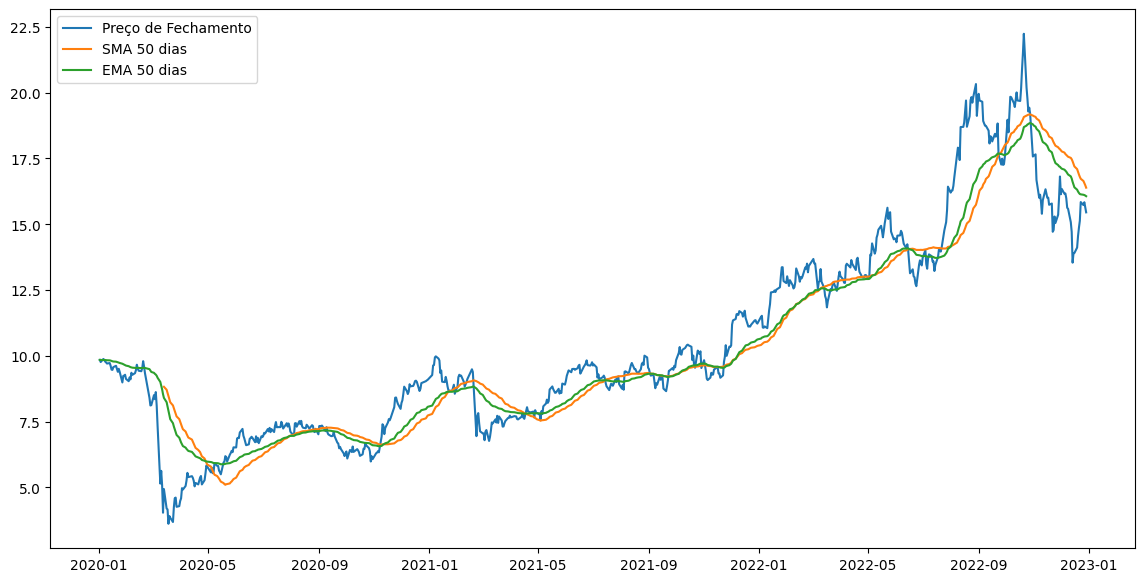

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Baixar dados
data = yf.download('PETR4.SA', start='2020-01-01', end='2023-01-01')

# Calcular SMA e EMA
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()

# Plotar
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Preço de Fechamento')
plt.plot(data['SMA_50'], label='SMA 50 dias')
plt.plot(data['EMA_50'], label='EMA 50 dias')
plt.legend()
plt.show()

# 2. Índice de Força Relativa (RSI)
# O RSI é um oscilador que mede a velocidade e a mudança dos movimentos de preços, geralmente usado para identificar condições de sobrecompra ou sobrevenda.

[*********************100%***********************]  1 of 1 completed


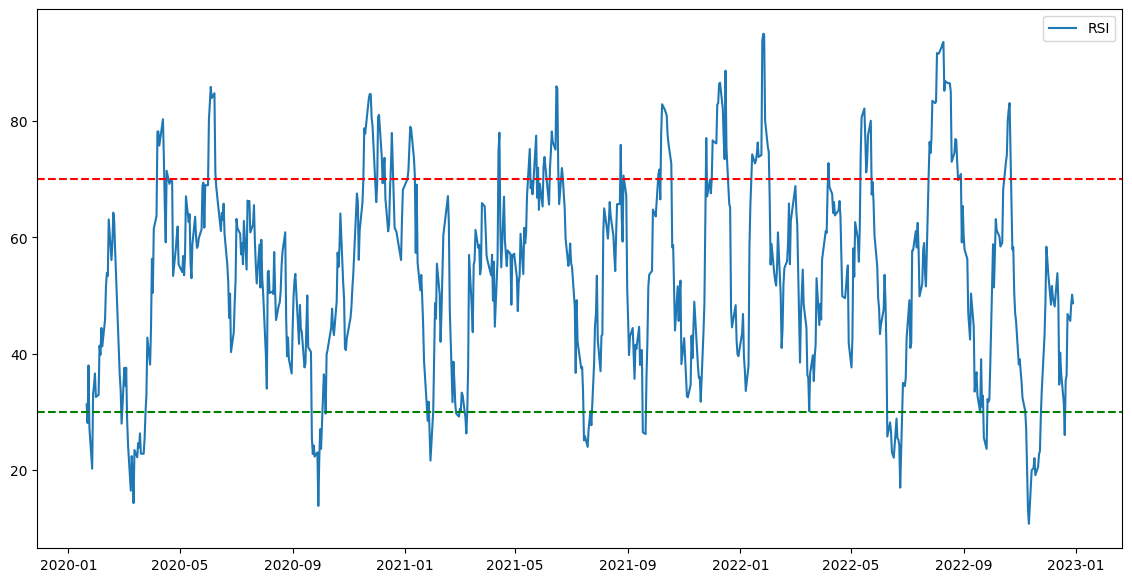

In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Baixar dados
data = yf.download('PETR4.SA', start='2020-01-01', end='2023-01-01')

# Calcular RSI
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Plotar
plt.figure(figsize=(14, 7))
plt.plot(data['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.legend()
plt.show()

# 3. Bandas de Bollinger
# As Bandas de Bollinger consistem em uma SMA e duas bandas (superior e inferior) que são desvios padrão da SMA. Elas são usadas para medir a volatilidade.

[*********************100%***********************]  1 of 1 completed


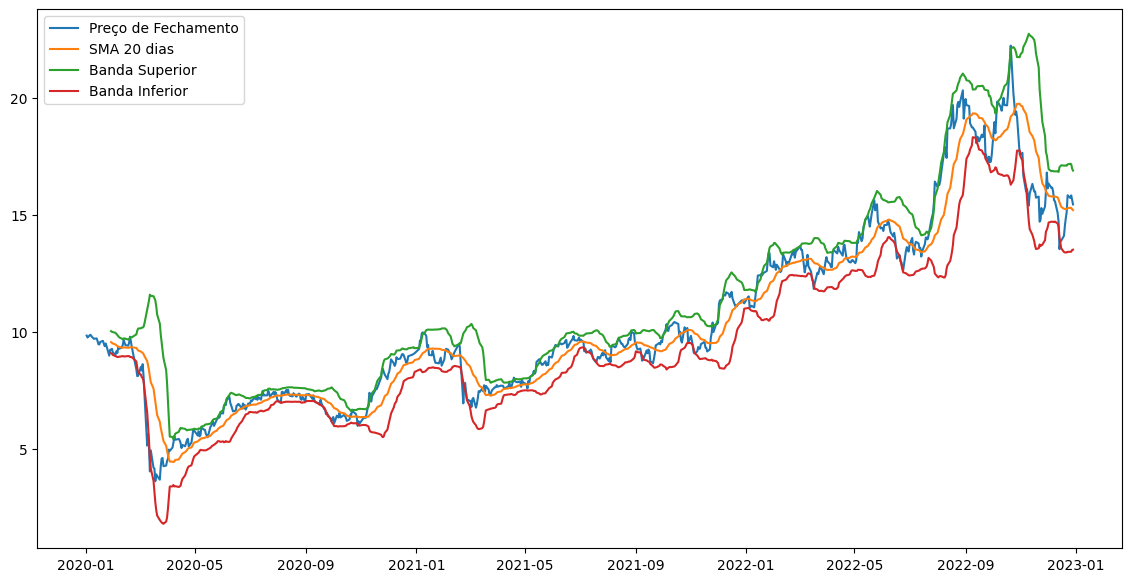

In [4]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Baixar dados
data = yf.download('PETR4.SA', start='2020-01-01', end='2023-01-01')

# Calcular Bandas de Bollinger
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['STD_20'] = data['Close'].rolling(window=20).std()
data['Banda_Superior'] = data['SMA_20'] + (data['STD_20'] * 2)
data['Banda_Inferior'] = data['SMA_20'] - (data['STD_20'] * 2)

# Plotar
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Preço de Fechamento')
plt.plot(data['SMA_20'], label='SMA 20 dias')
plt.plot(data['Banda_Superior'], label='Banda Superior')
plt.plot(data['Banda_Inferior'], label='Banda Inferior')
plt.legend()
plt.show()

# 4. MACD (Moving Average Convergence Divergence)
# O MACD é um indicador de momentum que mostra a relação entre duas médias móveis de preços. Ele é composto pela linha MACD, a linha de sinal e o histograma.|

[*********************100%***********************]  1 of 1 completed


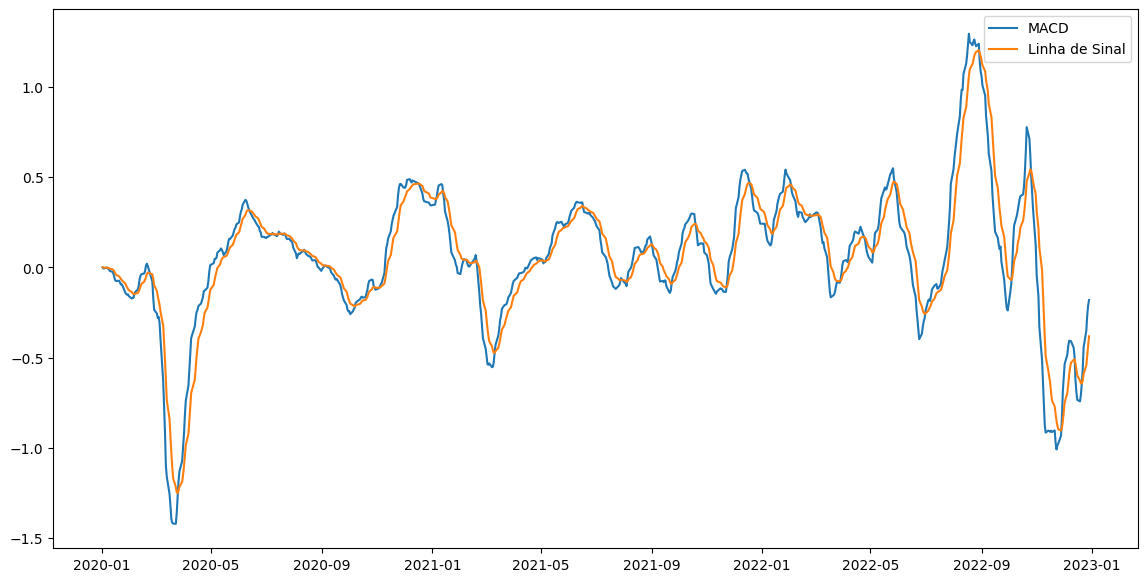

In [5]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Baixar dados
data = yf.download('PETR4.SA', start='2020-01-01', end='2023-01-01')

# Calcular MACD
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['Sinal'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Plotar
plt.figure(figsize=(14, 7))
plt.plot(data['MACD'], label='MACD')
plt.plot(data['Sinal'], label='Linha de Sinal')
plt.legend()
plt.show()

# 5. Suporte e Resistência
Identificar níveis de suporte e resistência com base em máximos e mínimos históricos.

[*********************100%***********************]  1 of 1 completed


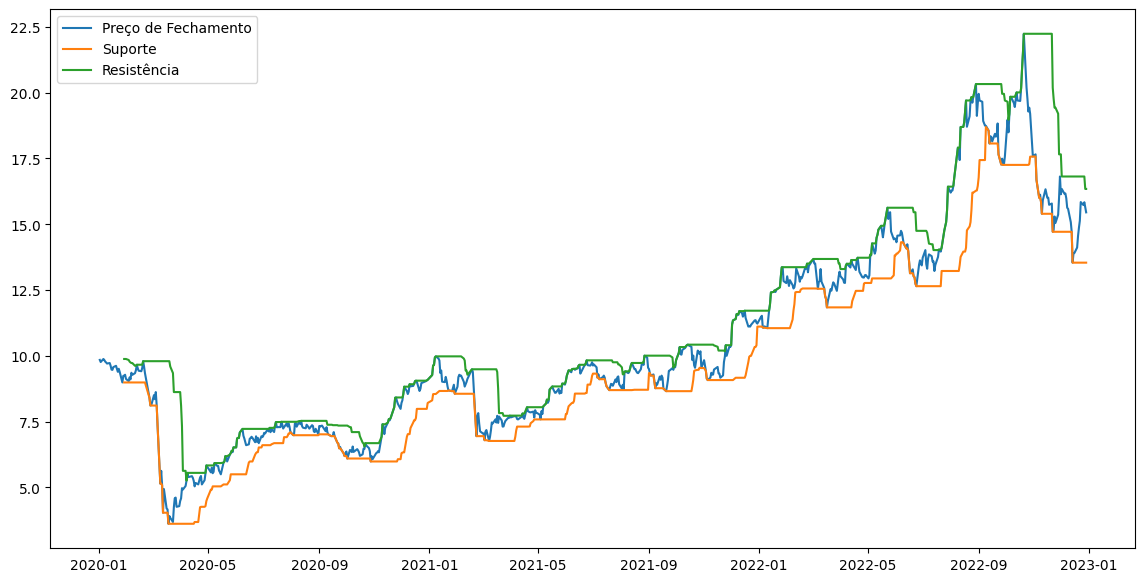

In [6]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Baixar dados
data = yf.download('PETR4.SA', start='2020-01-01', end='2023-01-01')

# Identificar suporte e resistência
data['Min'] = data['Close'].rolling(window=20).min()
data['Max'] = data['Close'].rolling(window=20).max()

# Plotar
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Preço de Fechamento')
plt.plot(data['Min'], label='Suporte')
plt.plot(data['Max'], label='Resistência')
plt.legend()
plt.show()

# 6. Backtesting de Estratégias
Implementar e testar estratégias de trading usando dados históricos para avaliar sua eficácia.

[*********************100%***********************]  1 of 1 completed


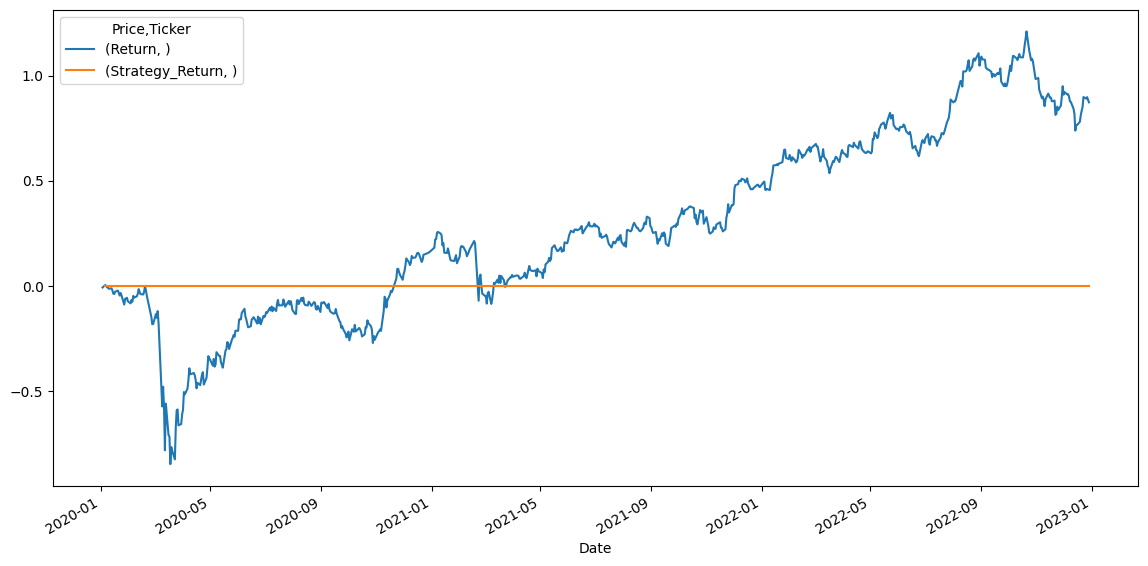

In [7]:
import pandas as pd
import yfinance as yf

# Baixar dados
data = yf.download('PETR4.SA', start='2020-01-01', end='2023-01-01')

# Estratégia simples: Compra quando SMA 50 cruza SMA 200 para cima
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()
data['Signal'] = 0
data['SMA_50'][50:] > data['SMA_200'][50:]
data['Position'] = data['Signal'].diff()

# Calcular retornos
data['Return'] = data['Close'].pct_change()
data['Strategy_Return'] = data['Return'] * data['Position'].shift(1)

# Plotar retornos acumulados
data[['Return', 'Strategy_Return']].cumsum().plot(figsize=(14, 7))
plt.show()

# 7. Análise de Correlação
Analisar a correlação entre diferentes ativos para diversificação ou pares de trading.

[*********************100%***********************]  3 of 3 completed


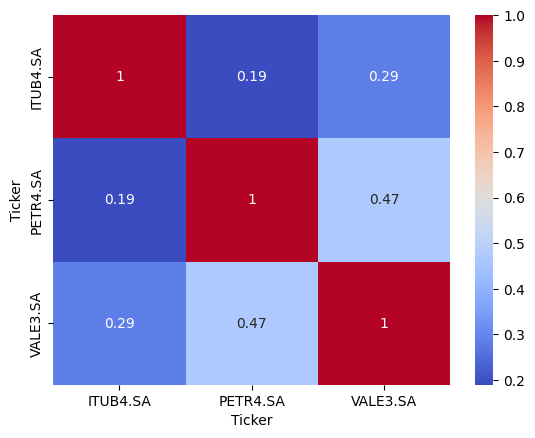

In [8]:

import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# Baixar dados
tickers = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA']
data = yf.download(tickers, start='2020-01-01', end='2023-01-01')['Close']

# Calcular correlação
correlation_matrix = data.corr()

# Plotar heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# 10. Machine Learning para Previsão de Preços
Utilizar modelos de machine learning, como regressão linear, redes neurais, ou modelos de séries temporais, para prever preços futuros.

In [9]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Baixar dados
data = yf.download('PETR4.SA', start='2020-01-01', end='2023-01-01')

# Preparar dados
data['Return'] = data['Close'].pct_change()
data = data.dropna()
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Dividir dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Prever
y_pred = model.predict(X_test)

# Avaliar
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

[*********************100%***********************]  1 of 1 completed

MSE: 0.00903540319982648


# Conclusão
Python oferece uma ampla gama de ferramentas e bibliotecas para implementar estratégias de análise técnica no mercado financeiro. Desde indicadores simples, como médias móveis e RSI, até técnicas mais avançadas, como machine learning, Python é uma escolha poderosa para traders e analistas financeiros.